In [1]:
import sys
sys.path.append('C:\\Users\dell-pc\Desktop\大四上\Computer_Vision\CNN')
from data import *
from network import three_layer_cnn

In [2]:
# data
train_data, test_data = loaddata()

In [3]:
import numpy as np
print(train_data.keys())
print("Number of train items: %d" % len(train_data['images']))
print("Number of test items: %d" % len(test_data['labels']))
print("Edge length of picture : %f" % np.sqrt(len(train_data['images'][0])))
Class = set(train_data['labels'])
print("Total classes: ", Class)

dict_keys(['images', 'labels'])
Number of train items: 60000
Number of test items: 10000
Edge length of picture : 28.000000
Total classes:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [4]:
# reshape
def imageC(data_list):
    data = np.array(data_list).reshape(len(data_list), 1, 28, 28)
    return data
data = imageC(train_data['images'][0:3])
print(np.shape(data))

(3, 1, 28, 28)


In [5]:
# test
def test(cnn, test_batchSize):
    test_pred = []
    for i in range(int(len(test_data['images']) / test_batchSize)):
        out = cnn.inference(imageC(test_data['images'][i*test_batchSize:(i+1)*test_batchSize]))
        y = np.array(test_data['labels'][i*test_batchSize:(i+1)*test_batchSize])
        loss, pred = cnn.softmax_loss(out, y, mode='test')
        test_pred.extend(pred)
    # accuracy
    count = 0
    for i in range(len(test_pred)):
        if test_pred[i] == test_data['labels'][i]:
            count += 1
    acc = count / len(test_pred)
    return acc, loss

In [20]:
# train
print('Begin training ...')
cnn = three_layer_cnn()
cnn.initial()
epoch = 3
batchSize = 30
train_loss = []
train_acc = []
test_loss = []
test_acc = []
for i in range(epoch):
    for j in range(int(len(train_data['images']) / batchSize)):
    # for j in range(30):
        data = imageC(train_data['images'][j*batchSize:(j+1)*batchSize])
        label = np.array(train_data['labels'][j*batchSize:(j+1)*batchSize])
        output = cnn.forward(data)
        loss1, pred = cnn.softmax_loss(output, label)
        train_loss.append(loss1)
        if j % 200 == 0:
            # train
            count = 0
            for k in range(batchSize):
                if pred[k] == label[k]:
                    count += 1
            acc1 = count / batchSize
            train_acc.append(acc1)
        cnn.backward()
        if j % 200 == 0:
            # test
            acc2, loss2 = test(cnn, 10)
            test_loss.append(loss2)
            test_acc.append(acc2)
            print('Epoch: %d; Item: %d; Train loss: %f; Test loss: %f; Train acc: %f; Test acc: %f ' % (i, (j + 1) * batchSize, loss1, loss2, acc1, acc2))
print('End training!')


Begin training ...
Epoch: 0; Item: 30; Train loss: 2.505278; Test loss: 2.230049; Train acc: 0.066667; Test acc: 0.147300 
Epoch: 0; Item: 6030; Train loss: 0.634433; Test loss: 0.699360; Train acc: 0.966667; Test acc: 0.761600 
Epoch: 0; Item: 12030; Train loss: 0.745243; Test loss: 0.585099; Train acc: 0.833333; Test acc: 0.767300 
Epoch: 0; Item: 18030; Train loss: 0.746966; Test loss: 0.592626; Train acc: 0.800000; Test acc: 0.827100 
Epoch: 0; Item: 24030; Train loss: 0.469368; Test loss: 0.712330; Train acc: 0.866667; Test acc: 0.832300 
Epoch: 0; Item: 30030; Train loss: 0.634824; Test loss: 0.465902; Train acc: 0.833333; Test acc: 0.810400 
Epoch: 0; Item: 36030; Train loss: 0.740853; Test loss: 0.581098; Train acc: 0.800000; Test acc: 0.746200 
Epoch: 0; Item: 42030; Train loss: 0.570949; Test loss: 0.360133; Train acc: 0.866667; Test acc: 0.812700 
Epoch: 0; Item: 48030; Train loss: 0.576225; Test loss: 0.689503; Train acc: 0.833333; Test acc: 0.802200 
Epoch: 0; Item: 54030;

In [21]:
# test
acc, loss = test(cnn, 100)
print('Accuracy for 3-layers convolutional neural networks: %f' % acc)

Accuracy for 3-layers convolutional neural networks: 0.688200


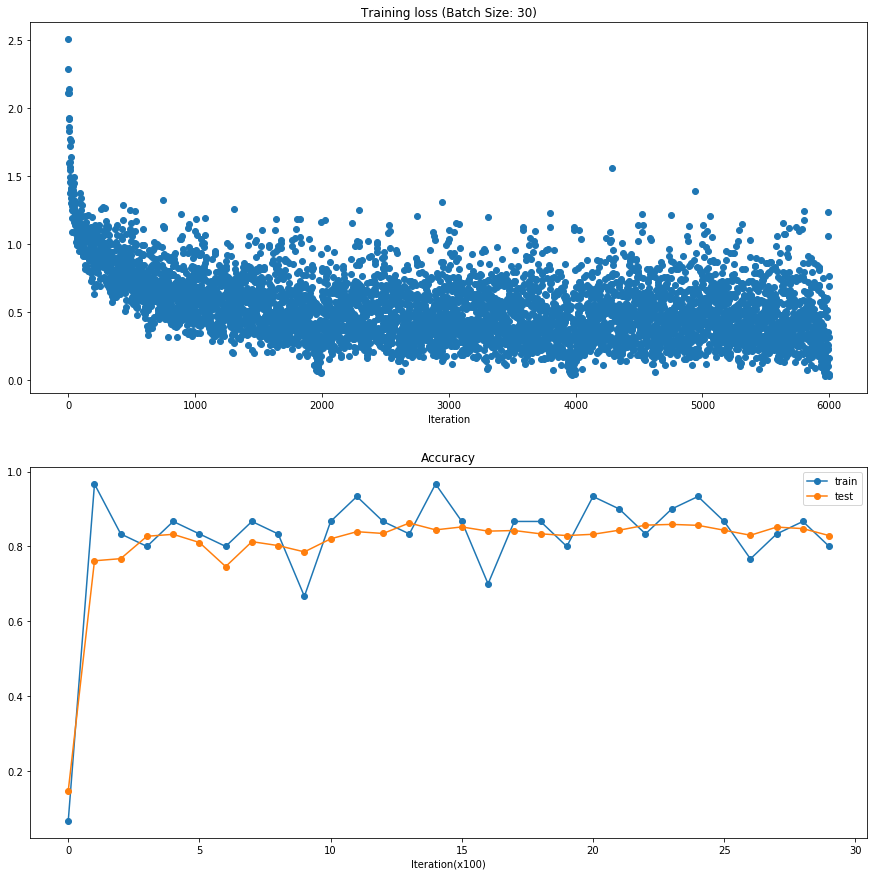

In [22]:
# plot
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

ax = plt.subplot(2, 1, 1)
plt.title('Training loss (Batch Size: 30)')
plt.xlabel('Iteration')
plt.plot(train_loss, 'o')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.xlabel('Iteration(x100)')
plt.plot(train_acc, '-o', label='train')
plt.plot(test_acc, '-o', label='test')
plt.legend(loc='upper right', ncol=1)
plt.gcf().set_size_inches(15, 15)
plt.show()